In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
churn_data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# to get names of the columns in the customer churn dataset
churn_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
#shape of the dataset
churn_data.shape

(7043, 21)

In [ ]:
#to get the information about the dataset and see if there is need for cleaning for the dataset for compatibility to work with

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# from the above we can see that the column Totalcharges has a datatype of object instead of being float64 which is more suitable to work with
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors = 'coerce')
churn_data.loc[churn_data['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# Looking into the dataset we can see that there are missing values in the TotalCharges when there are cuncurrently  zeros in the tenure column
# we will replace the missing values of this column with zeros
churn_data[churn_data['TotalCharges'].isna()==True] = 0


In [ ]:

# checking if the changes have been made to column TotalCharges to a float4 datatype
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
churn_data['gender'].replace(['Male','Female'],[0,1],inplace=True)
churn_data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
churn_data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
churn_data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
churn_data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
churn_data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
churn_data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
churn_data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
churn_data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
churn_data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
churn_data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
churn_data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
churn_data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
churn_data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
churn_data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
churn_data['Churn'].replace(['Yes','No'],[1,0],inplace=True)


In [ ]:
# printing the dataset after encoding
churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,1,84.80,1990.50,0
7039,2234-XADUH,1,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,3,103.20,7362.90,0
7040,4801-JZAZL,1,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,8361-LTMKD,0,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,1,74.40,306.60,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn import model_selection, metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline

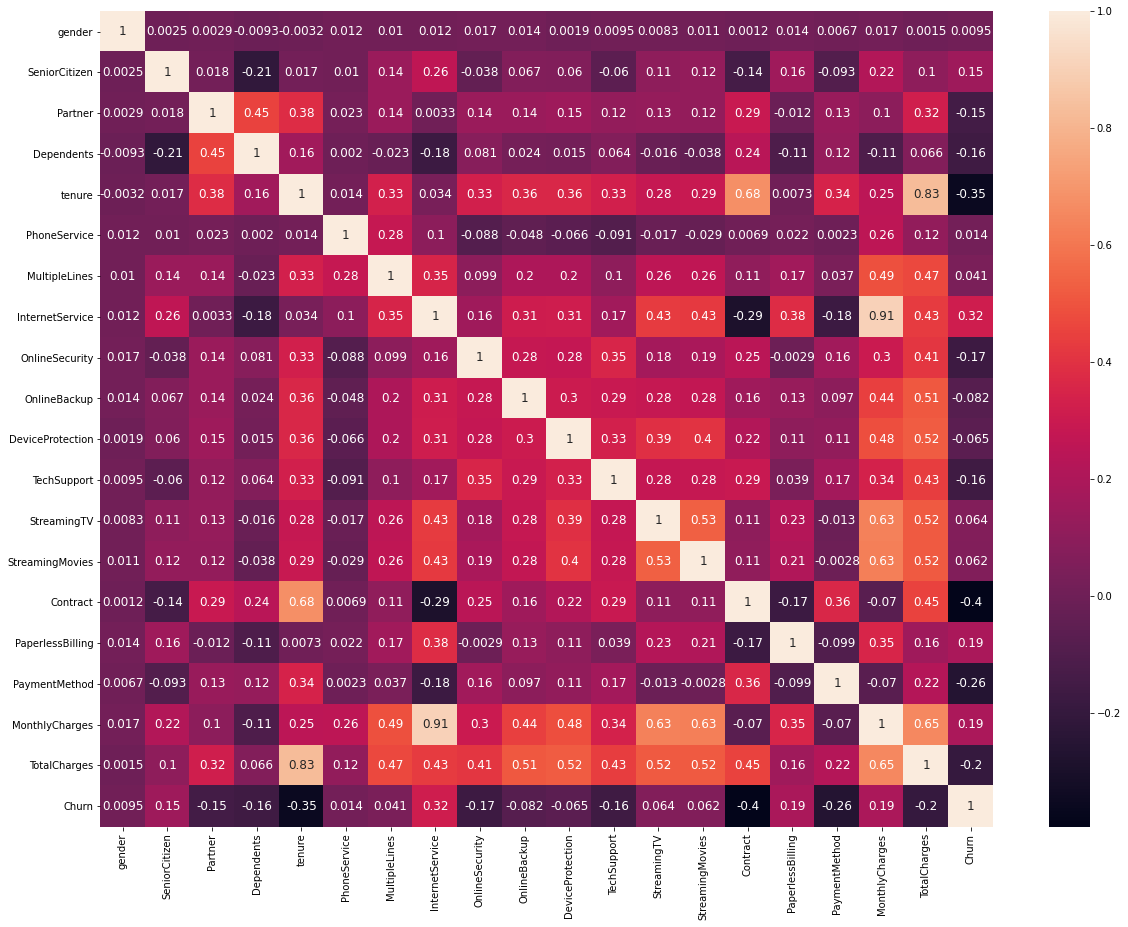

In [ ]:
# to see relationship between customer data and churn using correlation
corr = churn_data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
#removing columns that are negatively correlated to customer churn
churn_data=churn_data.drop(['customerID', 'Partner', 'Dependents',
       'tenure','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport','Contract', 'PaymentMethod',
       'TotalCharges'], axis=1)

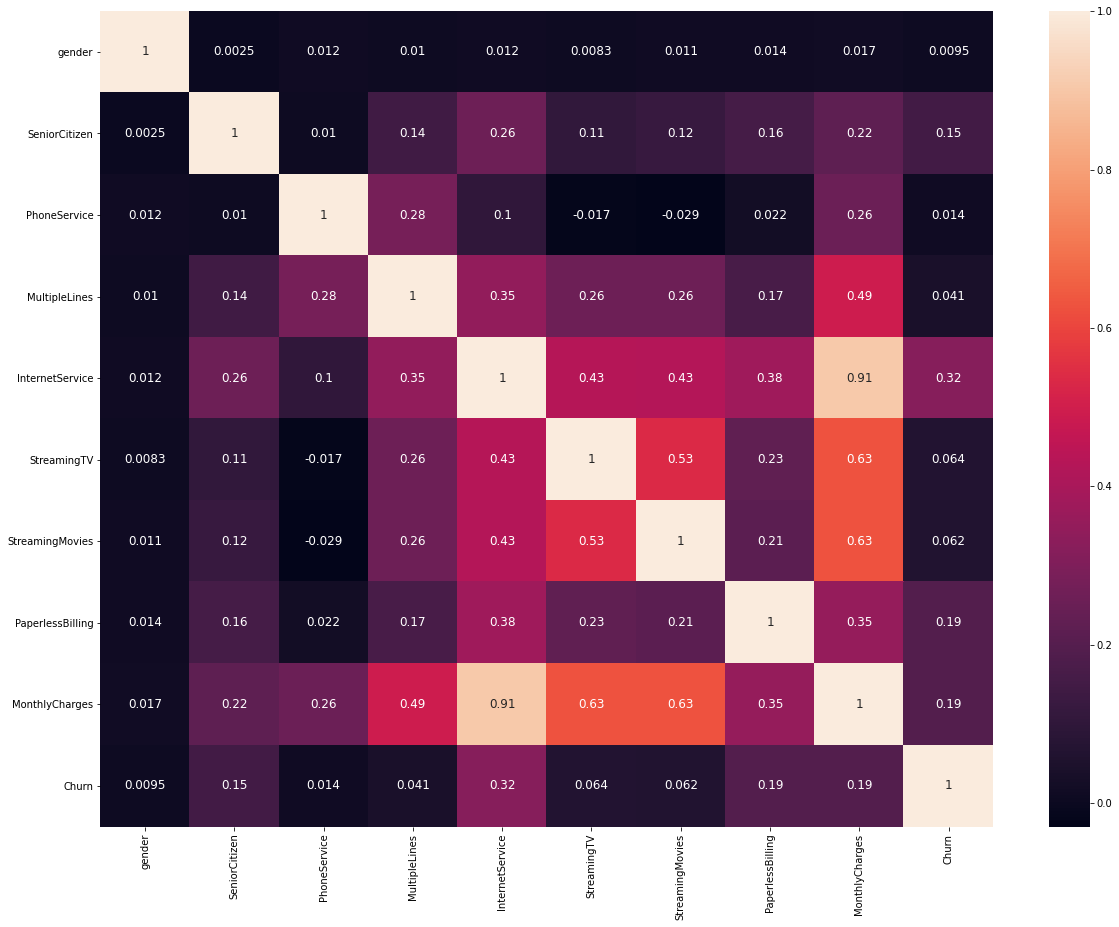

In [ ]:
# correlation visualisation of the variables using heatmap 
corr = churn_data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
churn_data.head()

,gender,SeniorCitizen,PhoneService,MultipleLines,InternetService,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn
0,1,0,0,0,1,0,0,1,29.85,0
1,0,0,1,0,1,0,0,0,56.95,0
2,0,0,1,0,1,0,0,1,53.85,1
3,0,0,0,0,1,0,0,0,42.30,0
4,1,0,1,0,2,0,0,1,70.70,1


In [ ]:

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
churn_data["gender"]= encoder.fit_transform(churn_data['gender'])
SeniorCitizen = encoder.fit_transform(churn_data['SeniorCitizen'])
PhoneService= encoder.fit_transform(churn_data['PhoneService'])
MultipleLines= encoder.fit_transform(churn_data['MultipleLines'])
InternetService= encoder.fit_transform(churn_data['InternetService'])
StreamingTV= encoder.fit_transform(churn_data['StreamingTV'])
StreamingMovies= encoder.fit_transform(churn_data['StreamingMovies'])
PaperlessBilling= encoder.fit_transform(churn_data['PaperlessBilling'])
Churn= encoder.fit_transform(churn_data['Churn'])


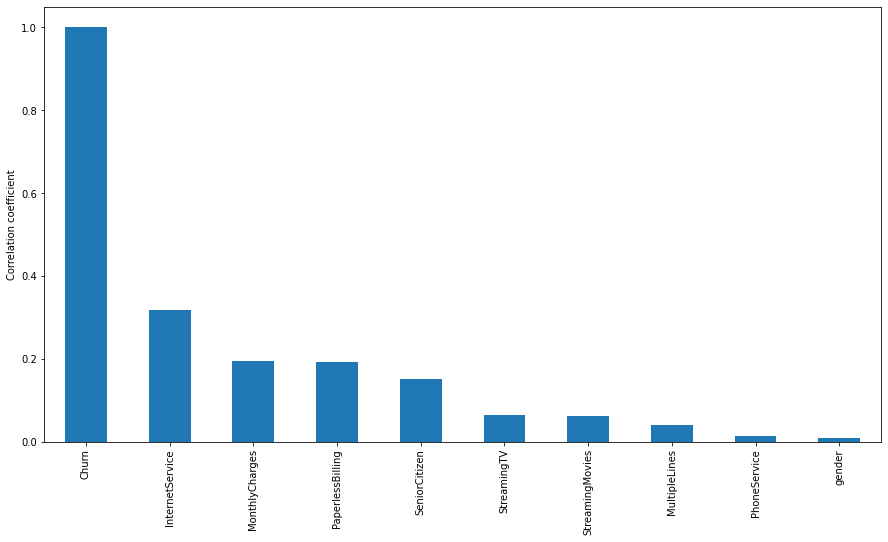

In [ ]:
##Graphical representation of the positively correlated variables to customer churn
plt.figure(figsize=(15,8))
plt.ylabel("Correlation coefficient")
churn_data.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")

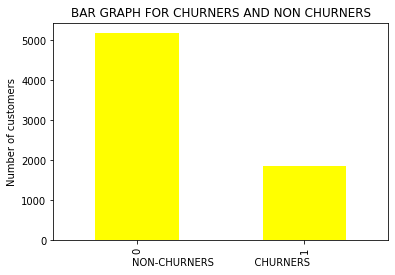

In [ ]:
# visualistic comparison of churning and non churning 
churn_data['Churn'].value_counts().plot(kind = 'bar', 
title ='BAR GRAPH FOR CHURNERS AND NON CHURNERS', color = 'yellow', align = 'center')
plt.ylabel("Number of customers")
plt.xlabel("NON-CHURNERS             CHURNERS")
plt.show()

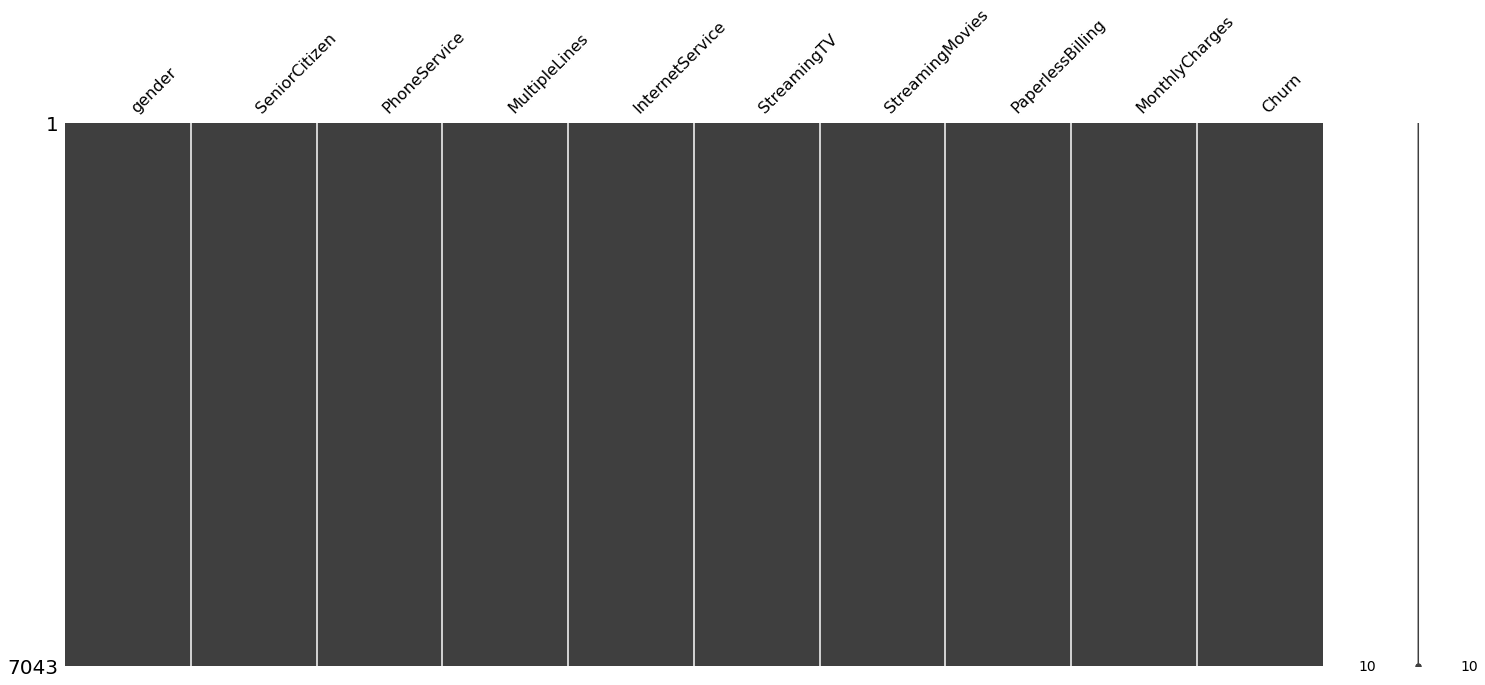

In [ ]:
ms.matrix(churn_data)

In [ ]:

X=churn_data.drop('Churn', axis=1)
Y=churn_data['Churn']

In [ ]:
# Splitting the dataset for training anfd tesitng ,80% goes to training while the remainder goes to testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, 
                                                    random_state=42)

In [ ]:
#Printing the number of rows needed for training and we see 4930 rows are used
X_train.shape

(5634, 9)

In [ ]:
y_train.shape

(5634,)

In [ ]:
X_test.shape

(1409, 9)

In [ ]:
y_test.shape

(1409,)

In [ ]:
#concatinating X_train and y_train
train=pd.concat([X_train,y_train],axis=1)

In [ ]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        #to get the parameters of xgboost
        xgb_param = alg.get_xgb_params() 
        
        #to convert into a datastructure internally used by xgboost for training efficiency 
        # and speed
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        
        #xgb.cv is used to find the number of estimators required for the parameters 
        # which are set
        cvresult = xgb.cv(xgb_param, xgtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                        metrics='auc', early_stopping_rounds=early_stopping_rounds)
        
        #setting the n_estimators parameter using set_params
        alg.set_params(n_estimators=cvresult.shape[0])
        
        print(alg.get_xgb_params())
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Churn'],eval_metric='auc')
    
    return alg

In [ ]:

# Function to get the accuracy of the model on the test data given the features considered.
def get_accuracy(alg,predictors):
    dtrain_predictions = alg.predict(X_test[predictors])
    dtrain_predprob = alg.predict_proba(X_test[predictors])[:,1]
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_test.values, 
                                                      dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test.values, 
                                                           dtrain_predprob))

In [ ]:

# Function to get the feature importances based on the model fit.
def get_feature_importances(alg):
    #to get the feature importances based on xgboost we use fscore
    feat_imp = pd.Series(alg._Booster.get_fscore()).sort_values(ascending=False)
    print(feat_imp)
    
    #this shows the feature importances on a bar chart
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [ ]:
target = 'Churn'
IDcol = 'customerID'

In [ ]:
!pip install xgboost

In [ ]:
def XgbClass(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,
             gamma=0,subsample=0.8,colsample_bytree=0.8):
    xgb1 = XGBClassifier(learning_rate=learning_rate,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         min_child_weight=min_child_weight,
                         gamma=gamma,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree)
    return xgb1

In [ ]:
# Function to return the list of predictors.
# These are the initial parameters before tuning.
def drop_features(l):
    return [x for x in train.columns if x not in l]

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb1

In [ ]:
predictors = drop_features([target, IDcol])
xgb1=XgbClass()
first_model=modelfit(xgb1, train, predictors)
xgb1.fit(train[predictors],train['Churn'])

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 53, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.8, 'verbosity': 1}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=53, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
get_accuracy(first_model,predictors)


Model Report
Accuracy : 0.7665
AUC Score (Train): 0.788274


In [ ]:
# saving the model using joblib
import joblib
filename="churn_predictor"

In [ ]:
model=joblib.dump(first_model,filename)